In [1]:
# All imports and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from citipy import citipy
import requests
from datetime import datetime
from config import weather_api_key

In [2]:
# Create set of random longitudes and latitudes
lats = np.random.uniform(low=-90.00, high=90.00, size=1500)
longs = np.random.uniform(low=-180.00, high=180.00, size=1500)
lat_longs = zip(lats, longs)
lat_longs

In [3]:
# Add lat_longs to a list to unpack data
coordinates = list(lat_longs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5809be67b32647cbfb2afe6fa269d78d


In [6]:
# Create empty list to hold city weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval")
print("-----------------------------")

# Creating counters
record_count = 1
set_count = 1

# Looping through cities
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run city API request
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | kaitangata
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | nanortalik
Processing Record 5 of Set 1 | tigil
Processing Record 6 of Set 1 | aklavik
Processing Record 7 of Set 1 | samarai
Processing Record 8 of Set 1 | pilar
Processing Record 9 of Set 1 | westport
Processing Record 10 of Set 1 | katiola
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | henties bay
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | nemuro
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | hualmay
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | chuy
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of

Processing Record 41 of Set 4 | hasaki
Processing Record 42 of Set 4 | dikson
Processing Record 43 of Set 4 | mullaitivu
City not found. Skipping...
Processing Record 44 of Set 4 | villa bruzual
Processing Record 45 of Set 4 | baykit
Processing Record 46 of Set 4 | ketchikan
Processing Record 47 of Set 4 | flin flon
Processing Record 48 of Set 4 | yorosso
Processing Record 49 of Set 4 | copiapo
Processing Record 50 of Set 4 | stornoway
Processing Record 1 of Set 5 | lumphat
Processing Record 2 of Set 5 | helong
Processing Record 3 of Set 5 | formoso do araguaia
City not found. Skipping...
Processing Record 4 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 5 | caravelas
Processing Record 6 of Set 5 | trapani
Processing Record 7 of Set 5 | saint-pascal
City not found. Skipping...
Processing Record 8 of Set 5 | lady frere
Processing Record 9 of Set 5 | oranjemund
Processing Record 10 of Set 5 | ballina
Processing Record 11 of Set 5 | bay roberts
Processing Re

Processing Record 28 of Set 8 | paamiut
Processing Record 29 of Set 8 | wicklow
Processing Record 30 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 31 of Set 8 | vetluga
Processing Record 32 of Set 8 | mentok
City not found. Skipping...
Processing Record 33 of Set 8 | kropotkin
Processing Record 34 of Set 8 | okhotsk
Processing Record 35 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 36 of Set 8 | ugoofaaru
Processing Record 37 of Set 8 | richards bay
Processing Record 38 of Set 8 | bay city
Processing Record 39 of Set 8 | kadykchan
City not found. Skipping...
Processing Record 40 of Set 8 | aboisso
Processing Record 41 of Set 8 | cidreira
Processing Record 42 of Set 8 | haimen
Processing Record 43 of Set 8 | winnemucca
Processing Record 44 of Set 8 | nurota
Processing Record 45 of Set 8 | nioaque
Processing Record 46 of Set 8 | mitu
Processing Record 47 of Set 8 | umea
Processing Record 48 of Set 8 | kailua
Processing Record 49 of Set 8 | klaksvik
Process

Processing Record 17 of Set 12 | cooma
Processing Record 18 of Set 12 | yei
Processing Record 19 of Set 12 | svetlyy
Processing Record 20 of Set 12 | pasighat
Processing Record 21 of Set 12 | kirakira
Processing Record 22 of Set 12 | yerazgavors
Processing Record 23 of Set 12 | komsomolskiy
Processing Record 24 of Set 12 | capim grosso
Processing Record 25 of Set 12 | shahr-e kord
Processing Record 26 of Set 12 | koindu
Processing Record 27 of Set 12 | san matias
Processing Record 28 of Set 12 | kahului
Processing Record 29 of Set 12 | adrar
Processing Record 30 of Set 12 | amboasary
Processing Record 31 of Set 12 | hami
Processing Record 32 of Set 12 | coolum beach
Processing Record 33 of Set 12 | laredo
Processing Record 34 of Set 12 | mangrol
Processing Record 35 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 36 of Set 12 | rendsburg
Processing Record 37 of Set 12 | kilimatinde
Processing Record 38 of Set 12 | bezhetsk
Processing Record 39 of Set 12 | argir
Proc

In [7]:
print(len(city_data))

556


In [8]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaitangata,-46.2817,169.8464,44.35,88,78,4.34,NZ,2021-09-16 00:18:36
1,Port Alfred,-33.5906,26.8910,55.89,82,39,8.32,ZA,2021-09-16 00:22:01
2,Cape Town,-33.9258,18.4232,54.88,88,20,3.00,ZA,2021-09-16 00:20:58
3,Nanortalik,60.1432,-45.2371,39.06,76,1,5.21,GL,2021-09-16 00:21:18
4,Tigil,57.8000,158.6667,53.89,49,20,6.58,RU,2021-09-16 00:22:03


In [9]:
new_column_order = ["City", "Country", "Date", 
                    "Lat", "Lng", "Max Temp", 
                    "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kaitangata,NZ,2021-09-16 00:18:36,-46.2817,169.8464,44.35,88,78,4.34
1,Port Alfred,ZA,2021-09-16 00:22:01,-33.5906,26.8910,55.89,82,39,8.32
2,Cape Town,ZA,2021-09-16 00:20:58,-33.9258,18.4232,54.88,88,20,3.00
3,Nanortalik,GL,2021-09-16 00:21:18,60.1432,-45.2371,39.06,76,1,5.21
4,Tigil,RU,2021-09-16 00:22:03,57.8000,158.6667,53.89,49,20,6.58


In [10]:
# Create output file
output_data_file = "weather_data/cities.csv"

#Export to .csv
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [11]:
# Extract relevant fields from the dataframe for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']


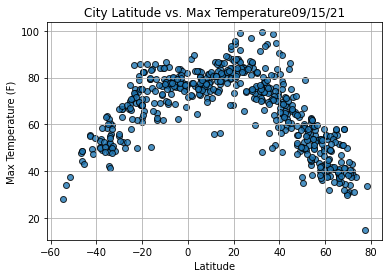

In [12]:
# Import time module
import time

# Build scatterplot
plt.scatter(lats, 
            max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")

plt.show()

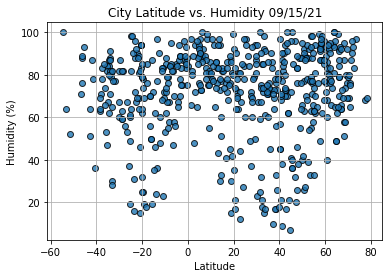

In [13]:
# Humidity Scatterplot
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


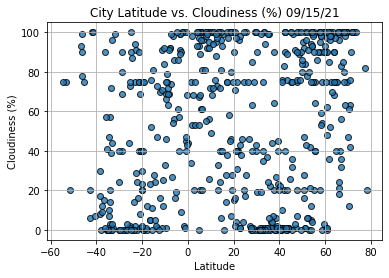

In [14]:
# Cloudiness Scatterplot
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


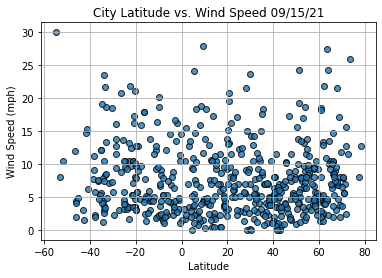

In [15]:
# Windspeed Scatterplot
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import module
from scipy.stats import linregress

# Create function to perform linear regression on weather data parameters
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
# Northern and Southern Dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

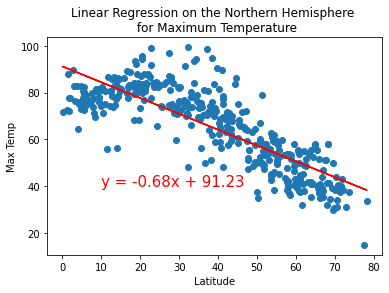

In [35]:
# Linear Regression for northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                      'Max Temp', (10, 40))


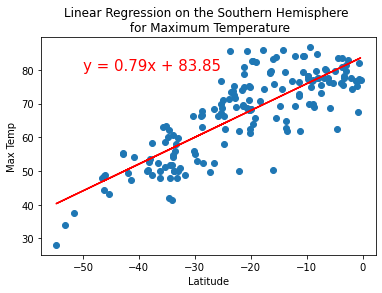

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,80))

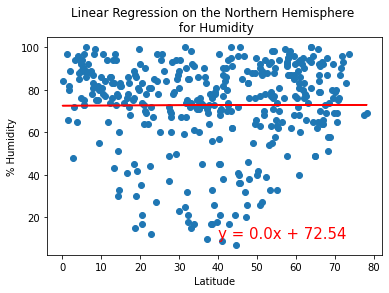

In [41]:
# Percent Humidity Graphs Northern
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n for Humidity",
                      "% Humidity",(40,10))

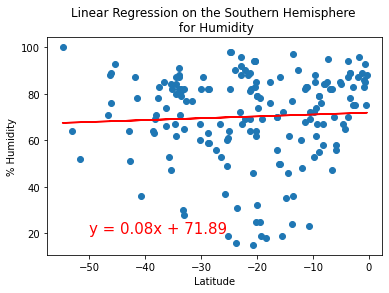

In [44]:
# Percent Humidity Graphs Southern
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for Humidity",
                      "% Humidity",(-50,20))

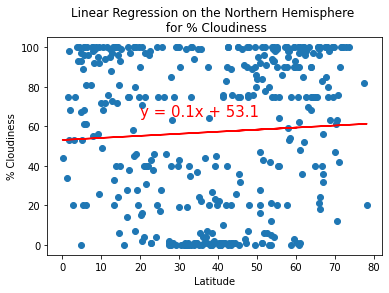

In [46]:
# Percent Cloudiness Graphs Northern Hemi
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n for % Cloudiness",
                      "% Cloudiness",(20,65))

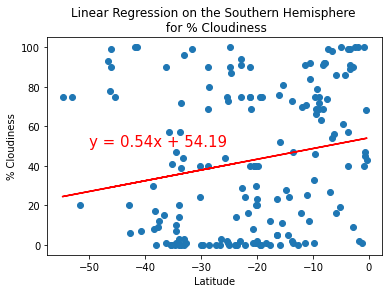

In [49]:
# Percent Cloudiness Graphs Southern Hemi
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for % Cloudiness",
                      "% Cloudiness",(-50,50))

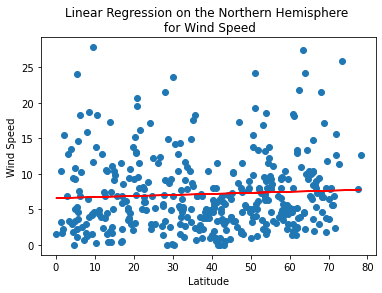

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

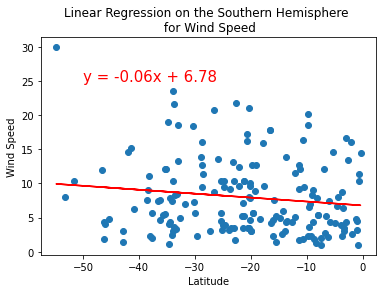

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-50,25))